In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
class BorderEquation:
	def __init__(self) -> None:
		# ct1*y(a) + ct2*y'(a) = ct
		# dt1*y(b) + dt2*y'(b) = dt
		self.ct1 = 1
		self.ct2 = 0.
		self.ct = 0.
		self.dt1 = 1
		self.dt2 = 0.
		self.dt = 0.
		self.px = lambda x: 0.
		self.qx = lambda x: 0.
		self.rx = lambda x: np.cos(x)
		self.a = -np.pi / 2
		self.b = np.pi / 2

		self.exact = lambda x: (self.ct + self.dt) / 2 + x * (self.dt - self.ct) / np.pi - np.cos(x)

In [160]:
def ai(equation, xi, h):
	return 1.0 / (h ** 2) - equation.px(xi) / (2.0 * h)


def bi(equation, xi, h):
	return 2.0 / (h ** 2) - equation.qx(xi)


def ci(equation, xi, h):
	return 1.0 / (h ** 2) + equation.px(xi) / (2.0 * h)


def di(equation, xi):
	return equation.rx(xi)


def solve(equation, n: int):
	h = (equation.b - equation.a) / n

	epsilon = list()
	theta = list()

	epsilon.append(-equation.ct2 / (equation.ct1 * h - equation.ct2))
	theta.append(equation.ct * h / (equation.ct1 * h - equation.ct2))
	i = 1
	while i <= (n - 1):
		xi = equation.a + i * h
		lastE = epsilon[len(epsilon) - 1]
		lastN = theta[len(theta) - 1]

		localEpsilon = ci(equation, xi, h) / (bi(equation, xi, h) - ai(equation, xi, h) * lastE)
		localTheta = (lastN * ai(equation, xi, h) - di(equation, xi)) / (
				bi(equation, xi, h) - ai(equation, xi, h) * lastE)

		epsilon.append(localEpsilon)
		theta.append(localTheta)
		i += 1
	yn = (equation.dt2 * theta[len(theta) - 1] + equation.dt * h) / (
			equation.dt2 * (1 - epsilon[len(epsilon) - 1]) + equation.dt1 * h)
	result = np.zeros(int(n) + 1)
	output = list()

	result[n] = yn
	output.append((equation.a + n * h, yn))
	i = n
	while i >= 1:
		result[i - 1] = result[i] * epsilon[i - 1] + theta[i - 1]
		xi = equation.a + (i - 1) * h

		output.append((xi, result[i - 1]))
		i -= 1
	return output

In [170]:
def run_task(n=10, A=0, B=0, a=-np.pi / 2, b=np.pi / 2):
	equation = BorderEquation()
	equation.a = a
	equation.b = b
	equation.ct = A
	equation.dt = B
	result = solve(equation, n)
	x_dimension = list()
	y_dimension = list()
	error_list = list()
	for i in range(len(result)):
		x_dimension.append(result[i][0])
		y_dimension.append(result[i][1])
		error_list.append(np.abs(result[i][1] - equation.exact(result[i][0])))

	fig, ax = plt.subplots(2, 1, figsize=(10, 15), dpi=100)
	ax[0].plot(x_dimension, y_dimension, label="solution")
	ax[0].set_title("Solution")
	ax[0].legend()
	ax[1].plot(x_dimension, error_list, label="precision")
	ax[1].set_title("Error")
	ax[1].legend()

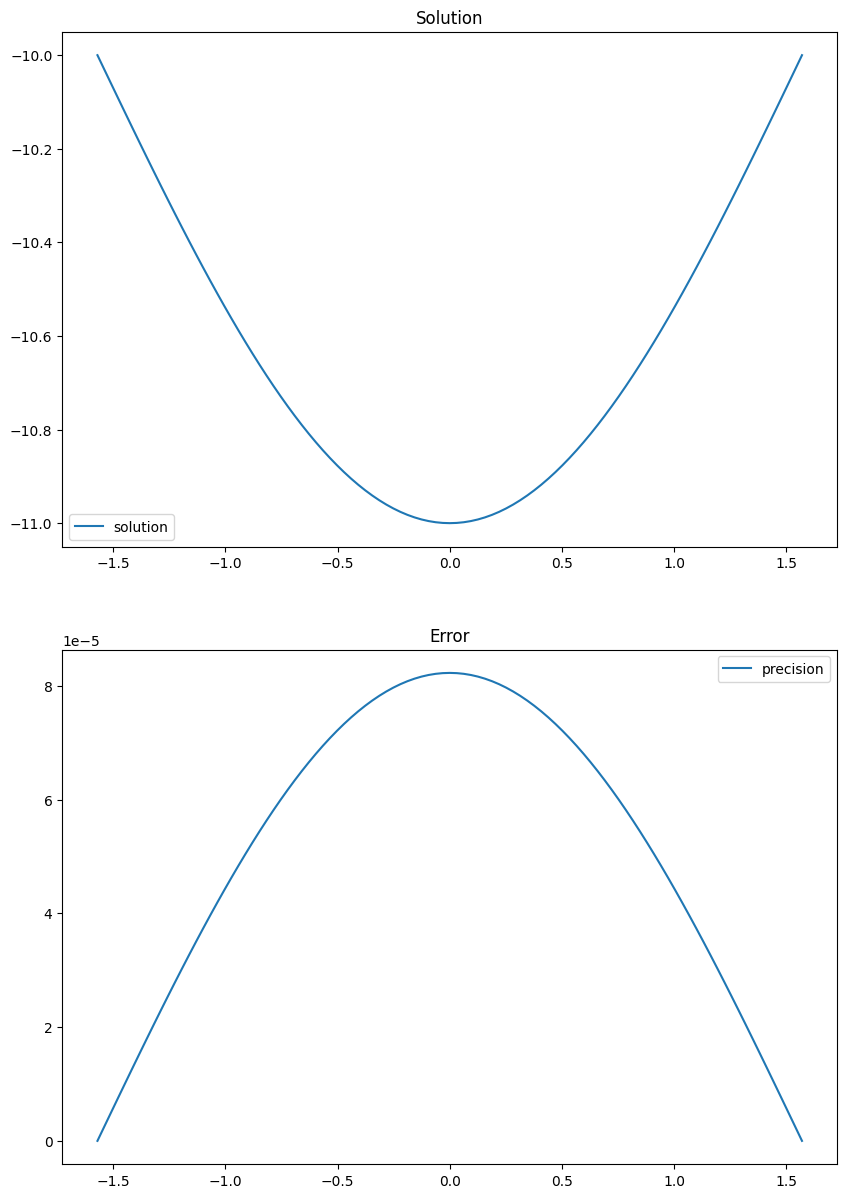

In [179]:
run_task(100, -10, -10)